In [1]:
!rm -rf .pyc
# !rm -rf .ipynbcheckpoints

In [2]:
import sys
sys.path.append("/home/emmanuel/code/destructive-deep-learning")
sys.path.append("/home/emmanuel/code/rbig")

import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

sns.reset_defaults()
sns.set_context(context="talk", font_scale=0.7)

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Logger

In [3]:
wandb.init(project="rbig4eo-hsi-pca", entity="emanjohnson91")
wandb.config.dataset = "indian_pines"
wandb.config.n_subsamples = 21_025
wandb.config.n_synth = 10_000
wandb.config.alpha = 1e-5
wandb.config.seed = 123
wandb.config.tol_layers = 15
wandb.config.log = False

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Wandb version 0.10.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


## HSI Dataset

http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat

In [4]:
import urllib.request


url = "http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat"
filename = "indian_pines_gt.mat"
urllib.request.urlretrieve(url, filename)

('indian_pines_gt.mat', <http.client.HTTPMessage at 0x7f159449b0a0>)

In [5]:
hsi_img = loadmat("./hsi_data/indian_pines_corrected.mat")

X = hsi_img['indian_pines_corrected']

print(X.shape)

(145, 145, 200)


In [6]:
rgb_idx =  tuple([..., [110, 40, 12]])

### Plot Image

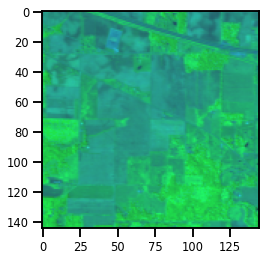

In [7]:
fig, ax = plt.subplots()

ax.imshow(X[rgb_idx]/X[rgb_idx].max())


if wandb.config.log:
    wandb.log({"image": plt})
else:
    plt.savefig("./figures/image.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()


#### Vector Representation

In [8]:
# create a long vector
X_vec = X.reshape(-1, X.shape[-1])
# y_vec = y.flatten()[:, np.newaxis]


# scale data
from sklearn.preprocessing import StandardScaler

x_transformer = StandardScaler()

X_vec = x_transformer.fit_transform(X_vec)

### Random Subset

In [9]:
# rng = np.random.RandomState(123)

# rand_idx = rng.randint(0, X_vec.shape[0], wandb.config.n_subsamples)

X_vec_s = X_vec#[rand_idx]
print(X_vec_s.shape)

(21025, 200)


#### Covariance

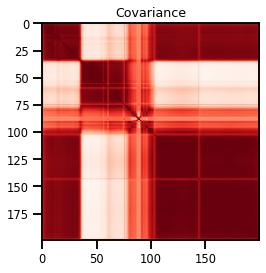

In [10]:
fig, ax = plt.subplots()

ax.imshow(np.cov(X_vec_s,rowvar=False), cmap='Reds')
ax.set_title("Covariance")


if wandb.config.log:
    wandb.log({"data_cov": plt})
else:
    plt.savefig("./figures/data_cov.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)

plt.show()

In [11]:
# with sns.axes_style('white'):
#     plt.figure()
#     pts = sns.jointplot(
#         x=X_vec_s[:, 0], y=X_vec_s[:, 2], 
#         kind="kde", 
#         color="red", 
#         bw_adjust=0.15,
# #         joint_kwgs={"fill":True}, 
#         space=0.0
#     #     fill=True
#     )
#     plt.xlabel("")
#     plt.ylabel("")
#     plt.suptitle("")
#     pts.ax_joint.set_xticks([])
#     pts.ax_joint.set_yticks([])
#     plt.tick_params(
#         axis='both',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         left=False,
#         top=False,         # ticks along the top edge are off
#         labelbottom=False,
#         labelleft=False)

#     if wandb.config.log:
#         wandb.log({"data_cov": plt})
#     else:
#         plt.savefig("./figures/data.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
#     plt.show()

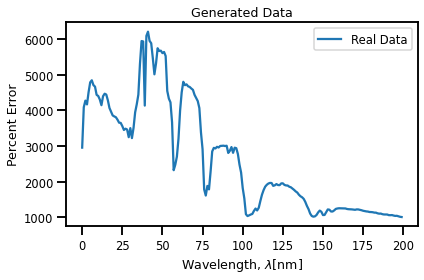

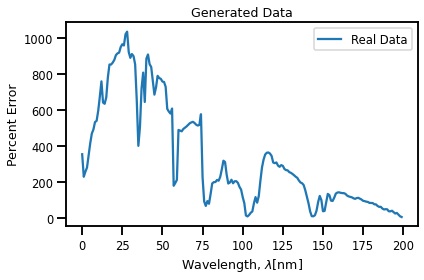

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Wandb version 0.10.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


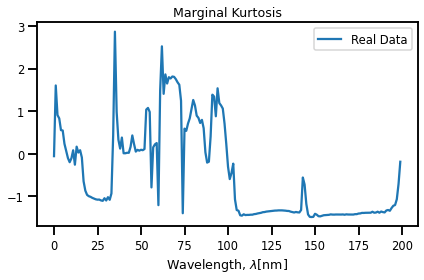

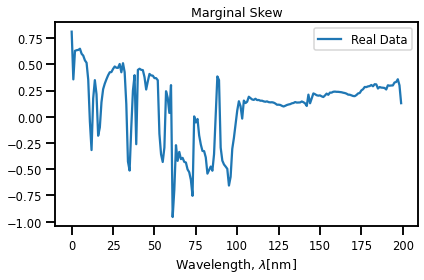

In [12]:
# ========================
# MEAN
# ========================
fig, ax = plt.subplots()

X_mean = x_transformer.inverse_transform(X_vec_s).mean(axis=0)

ax.plot(
    X_mean,
    label="Real Data")

ax.set_title(f"Generated Data")
ax.set_ylabel("Percent Error")
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_mean": plt})
else:
    plt.savefig("./figures/gen_data_mean.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ========================
# STANDARD DEVIATION
# ========================
fig, ax = plt.subplots()

X_std = x_transformer.inverse_transform(X_vec_s).std(axis=0)


ax.plot(
    X_std,
    label="Real Data")

ax.set_title(f"Generated Data")
ax.set_ylabel("Percent Error")
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_std": plt})
else:
    plt.savefig("./figures/gen_data_std.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ========================
# KURTOSIS
# ========================

fig, ax = plt.subplots()

X_kurt = stats.kurtosis(x_transformer.inverse_transform(X_vec_s), axis=0)

ax.plot(
    X_kurt,
    label="Real Data")

ax.set_title(f"Marginal Kurtosis")
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
plt.legend()
plt.tight_layout()
wandb.log({f"gen_data_kurtosis": wandb.Image(plt)})
plt.show()

# ==========
# SKEWNESS
# ==========
fig, ax = plt.subplots()


X_skew = stats.skew(x_transformer.inverse_transform(X_vec_s), axis=0)

ax.plot(
    X_skew,
    label="Real Data")

ax.set_title(f"Marginal Skew")
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")

plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_skew": plt})
else:
    plt.savefig("./figures/gen_data_skew.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

## Method 1 - PCA

First we do the traditional PCA decomposition:

$$
\begin{aligned}
\Sigma_x &= \text{Cov}(X) \\
V, D &= \text{eigs}(\Sigma_x) \\
\end{aligned}
$$

So if we want to transform data from the data space $X$ to the latent space $Z$, then we can use this transformation:

$$
Y = \frac{1}{\sqrt{\lambda}} V^\top X 
$$

And if we want to generate data from a normal distribution, we will have:

$$
X' = V \sqrt{\lambda} Z
$$

In the `scikit-learn` library, they already have a PCA implementation. You can add the `whiten` flag and it will do the scaling of the eigenvalues.

In [13]:
pca_clf = PCA(random_state=wandb.config.seed, whiten=True)

Xtrans_pca = pca_clf.fit_transform(X_vec_s)

In [14]:
Xtrans_cov = np.cov(Xtrans_pca, rowvar=False)

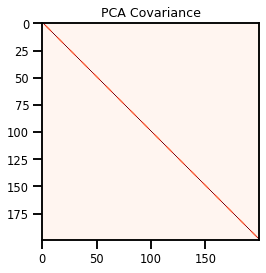

In [15]:
fig, ax = plt.subplots()

ax.imshow(Xtrans_cov,cmap="Reds")

ax.set_title("PCA Covariance")

if wandb.config.log:
    wandb.log({"pca_cov": plt})
else:
    plt.savefig("./figures/data.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)

plt.show()



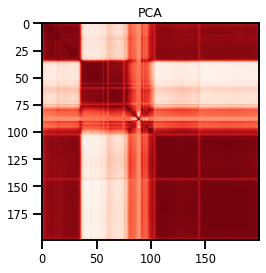

In [16]:
n_samples = 5_000
rng = np.random.RandomState(123)
X_g = rng.randn(n_samples,X_vec_s.shape[1])

X_samples_pca = pca_clf.inverse_transform(X_g)

# calculate the covariance
X_cov_approx = np.cov(X_samples_pca, rowvar=False)

# plot the covariance matrix
fig, ax = plt.subplots()

ax.imshow(X_cov_approx, cmap="Reds")
ax.set_title(f"PCA")


if wandb.config.log:
    wandb.log({"pca": plt})
else:
    plt.savefig("./figures/pca_data.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)

plt.show()

In [17]:
# with sns.axes_style('white'):
#     plt.figure()
#     pts = sns.jointplot(
#         x=X_samples_pca[:, 0], y=X_samples_pca[:, 1], 
#         kind="kde", 
#         color="red", 
#         bw_adjust=0.15,
# #         joint_kwgs={"fill":True}, 
#         space=0.0
#     #     fill=True
#     )
#     plt.xlabel("")
#     plt.ylabel("")
#     plt.suptitle("")
#     pts.ax_joint.set_xticks([])
#     pts.ax_joint.set_yticks([])
#     plt.tick_params(
#         axis='both',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         left=False,
#         top=False,         # ticks along the top edge are off
#         labelbottom=False,
#         labelleft=False)
#     if wandb.config.log:
#         wandb.log({"pca_joint": plt})
#     else:
#         plt.savefig("./figures/pca_joint.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
#     plt.show()

In [18]:
def percent_error(yreal, yhat):
    
    return 100*np.abs(yreal - yhat)/np.abs(yreal)

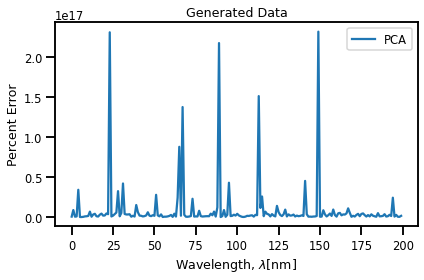

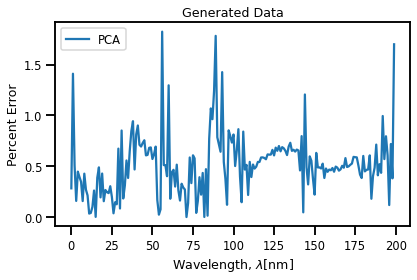

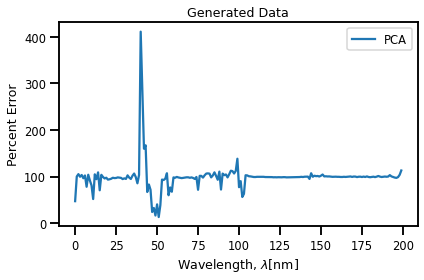

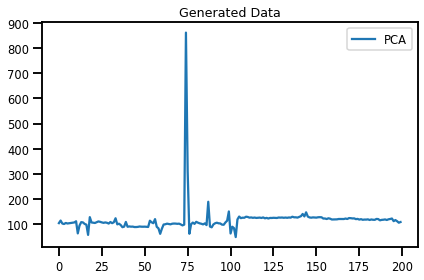

In [19]:
# ========================
# MEAN
# ========================
fig, ax = plt.subplots()

X_mean = X_vec_s.mean(axis=0)
X_samples_pca_mean = X_samples_pca.mean(axis=0)

ax.plot(
    percent_error(X_mean, X_samples_pca_mean),
    label="PCA")

ax.set_title(f"Generated Data")
ax.set_ylabel("Percent Error")
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_mean": plt})
else:
    plt.savefig("./figures/gen_data_mean_err.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ========================
# STANDARD DEVIATION
# ========================
fig, ax = plt.subplots()

X_std = X_vec_s.std(axis=0)


ax.plot(
    percent_error(X_std, X_samples_pca.std(axis=0)),
    label="PCA")

ax.set_title(f"Generated Data")
ax.set_ylabel("Percent Error")
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_std": plt})
else:
    plt.savefig("./figures/gen_data_std_err.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ========================
# KURTOSIS
# ========================

fig, ax = plt.subplots()

X_kurt = stats.kurtosis(X_vec_s, axis=0)

ax.plot(
    percent_error(X_kurt, stats.kurtosis(X_samples_pca, axis=0)),
    label="PCA")

ax.set_title(f"Generated Data")
ax.set_ylabel("Percent Error")
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
plt.legend()
plt.tight_layout()
if wandb.config.log:
    wandb.log({"gen_data_kurtosis": plt})
else:
    plt.savefig("./figures/gen_data_kurtosis_err.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ==========
# SKEWNESS
# ==========
fig, ax = plt.subplots()


X_skew = stats.skew(X_vec_s, axis=0)

ax.plot(
    percent_error(X_skew, stats.skew(X_samples_pca, axis=0)),
    label="PCA")

ax.set_title(f"Generated Data")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_skew": plt})
else:
    plt.savefig("./figures/gen_data_skew_err.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

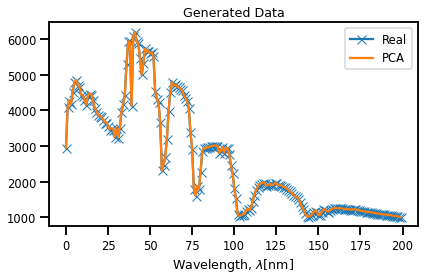

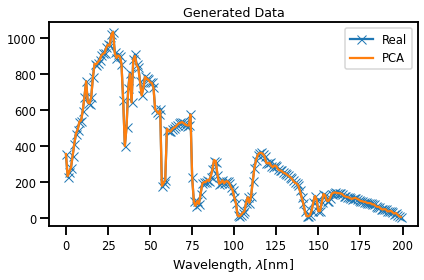

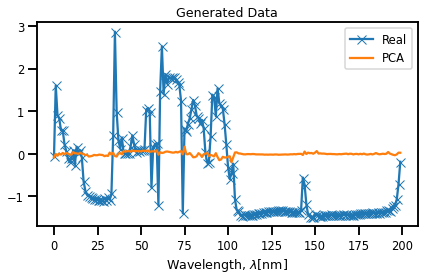

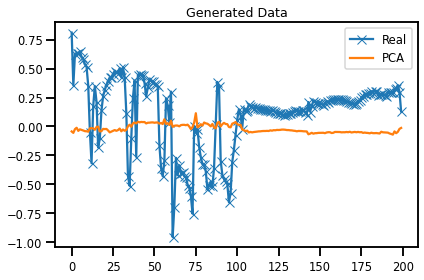

In [20]:
# ========================
# MEAN
# ========================
fig, ax = plt.subplots()

X_mean = x_transformer.inverse_transform(X_vec_s).mean(axis=0)
X_samples_pca_mean = x_transformer.inverse_transform(X_samples_pca).mean(axis=0)


ax.plot(
    X_mean,
    label="Real", marker='x')
ax.plot(
    X_samples_pca_mean,
    label="PCA")

ax.set_title(f"Generated Data")
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_mean": plt})
else:
    plt.savefig("./figures/gen_data_mean.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ========================
# STANDARD DEVIATION
# ========================
fig, ax = plt.subplots()

X_std = x_transformer.inverse_transform(X_vec_s).std(axis=0)

ax.plot(
    X_std,
    label="Real", marker='x')
ax.plot(
    x_transformer.inverse_transform(X_samples_pca).std(axis=0),
    label="PCA")

ax.set_title(f"Generated Data")
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_std": plt})
else:
    plt.savefig("./figures/gen_data_std.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ========================
# KURTOSIS
# ========================

fig, ax = plt.subplots()

X_kurt = stats.kurtosis(x_transformer.inverse_transform(X_vec_s), axis=0)

ax.plot(
    X_kurt,
    label="Real", marker='x')
ax.plot(
    stats.kurtosis(x_transformer.inverse_transform(X_samples_pca), axis=0),
    label="PCA")

ax.set_title(f"Generated Data")
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
plt.legend()
plt.tight_layout()
if wandb.config.log:
    wandb.log({"gen_data_kurtosis": plt})
else:
    plt.savefig("./figures/gen_data_kurtosis.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ==========
# SKEWNESS
# ==========
fig, ax = plt.subplots()


X_skew = stats.skew(x_transformer.inverse_transform(X_vec_s), axis=0)

ax.plot(
    X_skew,
    label="Real", marker='x')
ax.plot(
    stats.skew(x_transformer.inverse_transform(X_samples_pca), axis=0),
    label="PCA")

ax.set_title(f"Generated Data")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_skew": plt})
else:
    plt.savefig("./figures/gen_data_skew.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

## RBIG

### 1 Layer

In [21]:
from ddl.univariate import HistogramUnivariateDensity, KDEUnivariateDensity, KDEUnivariateDensityInterp
from ddl.independent import (
    IndependentInverseCdf,
    IndependentDensity,
    IndependentDestructor,
)
from ddl.linear import LinearProjector
from ddl.base import CompositeDestructor
from ddl.deep import DeepDestructor, DeepDestructorCV
from sklearn.base import clone
# Choose the Histogram estimator that converts the data X to uniform U(0,1)
univariate_density= clone(HistogramUnivariateDensity(
    bounds=0.2, bins="auto", alpha=1e-5
))

# conventience function
marginal_uniformization = IndependentDensity(
    univariate_estimators=univariate_density
)

# Creates "Destructor" D_theta_1
uniform_transform = IndependentDestructor(marginal_uniformization)

# Choose destructor D_theta_2 that converts data
marginal_gaussianization = IndependentInverseCdf()

# Choose a linear projection to rotate the features (PCA) "D_theta_3"
rotation = LinearProjector(linear_estimator=PCA(svd_solver='auto', random_state=123))

In [27]:
import tqdm
def get_rbig_layers(X, n_layers):
    
    layer_transforms = []


    X_trans = X.copy()


    for ilayer in tqdm.trange(n_layers):

        # create block!!!
        rbig_block_l = CompositeDestructor(
            destructors=[
                clone(uniform_transform), 
                clone(marginal_gaussianization), 
                clone(rotation)
            ],
            base_dist="gaussian", 
            random_state=123,
        )
        X_trans = rbig_block_l.fit_transform(X_trans)
    #     plot_joint(X_trans, subsample=1_000)
        # save transformation
        layer_transforms.append(rbig_block_l)
    return X_trans, layer_transforms
def get_rbig_samples(X_samples, layer_transforms):
    for rbig_block_l in tqdm.tqdm(reversed(layer_transforms)):
    #     print(rbig_block_l[0])


        # rotation
        X_samples = rbig_block_l.fitted_destructors_[2].inverse_transform(X_samples)
        
        # ======================
        # LEARN TRANSFORMATION
        # =====================
        mg_transform = CompositeDestructor(
            destructors=[
                clone(uniform_transform), 
                clone(marginal_gaussianization), 
            ],
            base_dist="gaussian", 
            random_state=123,
        )
        # inverse CDF transform
        X_samples = rbig_block_l.fitted_destructors_[1].inverse_transform(X_samples)

        # marginal uniformization transform
        X_samples = rbig_block_l.fitted_destructors_[0].inverse_transform(X_samples)
    
    return X_samples

### Optimum Layers

In [61]:
max_layers = 100
X_trans, layer_transforms = get_rbig_layers(X_vec_s, max_layers)

100%|██████████| 100/100 [02:24<00:00,  1.45s/it]


In [62]:
opt_layers = max_layers
print(opt_layers)

100


In [63]:
X_g = rng.randn(wandb.config.n_synth,X_vec_s.shape[1])
# X_samples_l1 = rbig_flow.inverse_transform(X_g)
X_samples_lopt = get_rbig_samples(X_g.copy(), layer_transforms)
# X_samples = rbig_flow.sample(n_samples=n_samples)
# calculatinverse_transformcovariance
X_cov_approx = np.cov(X_samples_lopt, rowvar=False)


83it [00:42,  1.95it/s]/home/emmanuel/code/destructive-deep-learning/ddl/univariate.py:384: BoundaryWarning: Some probability values (input to inverse functions) are either 0 or 1. Bounding values away from 0 or 1 to avoid infinities in output.  For example, the inverse cdf of a Gaussian at 0 will yield `-np.inf`.
  warnings.warn(
88it [00:45,  1.95it/s]/home/emmanuel/code/destructive-deep-learning/ddl/univariate.py:384: BoundaryWarning: Some probability values (input to inverse functions) are either 0 or 1. Bounding values away from 0 or 1 to avoid infinities in output.  For example, the inverse cdf of a Gaussian at 0 will yield `-np.inf`.
  warnings.warn(
89it [00:45,  1.95it/s]/home/emmanuel/code/destructive-deep-learning/ddl/univariate.py:384: BoundaryWarning: Some probability values (input to inverse functions) are either 0 or 1. Bounding values away from 0 or 1 to avoid infinities in output.  For example, the inverse cdf of a Gaussian at 0 will yield `-np.inf`.
  warnings.warn(
9

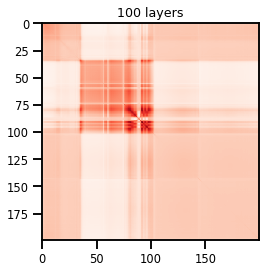

In [64]:

# plot the covariance matrix
fig, ax = plt.subplots()

ax.imshow(X_cov_approx, cmap="Reds")
ax.set_title(f"{opt_layers} layers")
if wandb.config.log:
    wandb.log({f"rbig_l{opt_layers}": plt})
else:
    plt.savefig(f"./figures/rbig_l{opt_layers}.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)

    
plt.show()

#### Generated Data

#### Percent Error

In [65]:
def percent_error(yreal, yhat):
    
    return 100 * np.abs(np.abs(yreal) - np.abs(yhat))/np.abs(yreal)

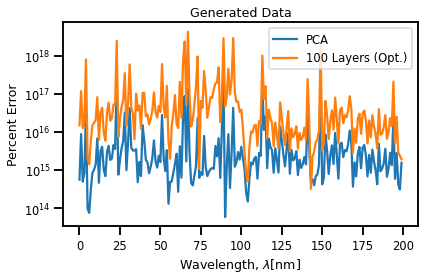

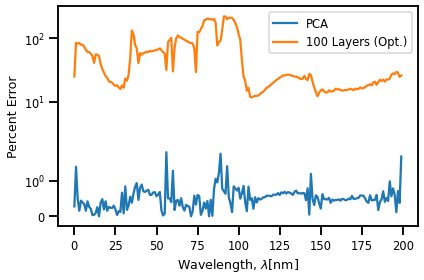

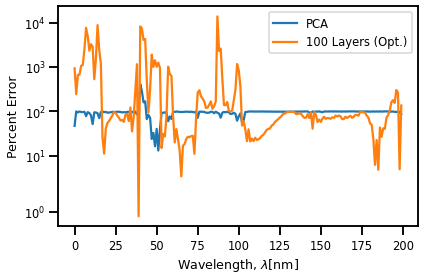

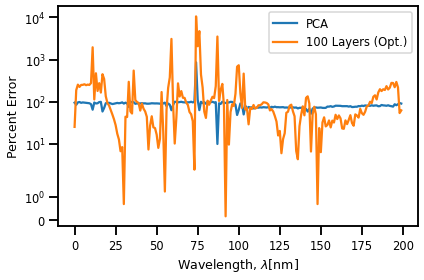

In [66]:
# ========================
# MEAN
# ========================
fig, ax = plt.subplots()

X_mean = X_vec_s.mean(axis=0)

ax.plot(
    percent_error(X_mean, X_samples_pca.mean(axis=0)),
    label="PCA")
ax.plot(
    percent_error(X_mean, X_samples_lopt.mean(axis=0)),
    label=f"{opt_layers} Layers (Opt.)")

ax.set_title(f"Generated Data")
ax.set_ylabel("Percent Error")
ax.set_yscale('symlog')
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_mean_err": plt})
else:
    plt.savefig("./figures/gen_data_mean_err.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ========================
# STANDARD DEVIATION
# ========================
fig, ax = plt.subplots()

X_std = X_vec_s.std(axis=0)


ax.plot(
    percent_error(X_std, X_samples_pca.std(axis=0)),
    label="PCA")
ax.plot(
    percent_error(X_std, X_samples_lopt.std(axis=0)),
    label=f"{opt_layers} Layers (Opt.)")

ax.set_ylabel("Percent Error")
ax.set_yscale('symlog')
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_std_err": plt})
else:
    plt.savefig("./figures/gen_data_std_err.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ========================
# KURTOSIS
# ========================

fig, ax = plt.subplots()

X_kurt = stats.kurtosis(X_vec_s, axis=0)

ax.plot(
    percent_error(X_kurt, stats.kurtosis(X_samples_pca, axis=0)),
    label="PCA")
ax.plot(
    percent_error(X_kurt, stats.kurtosis(X_samples_lopt, axis=0)),
    label=f"{opt_layers} Layers (Opt.)")

ax.set_ylabel("Percent Error")
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
ax.set_yscale('symlog')
plt.legend()
plt.tight_layout()
if wandb.config.log:
    wandb.log({"gen_data_kurtosis_err": plt})
else:
    plt.savefig("./figures/gen_data_kurtosis_err.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)

plt.show()

# ==========
# SKEWNESS
# ==========
fig, ax = plt.subplots()


X_skew = stats.skew(X_vec_s, axis=0)

ax.plot(
    percent_error(X_skew, stats.skew(X_samples_pca, axis=0)),
    label="PCA")
ax.plot(
    percent_error(X_skew, stats.skew(X_samples_lopt, axis=0)),
    label=f"{opt_layers} Layers (Opt.)")

ax.set_ylabel("Percent Error")
ax.set_yscale('symlog')
ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_skew_err": plt})
else:
    plt.savefig("./figures/gen_data_skew_err.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

### Generated Data

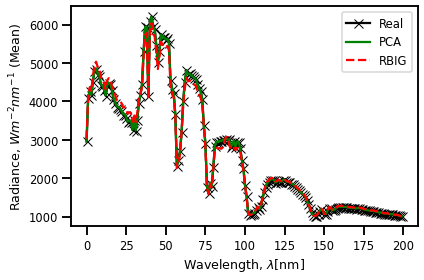

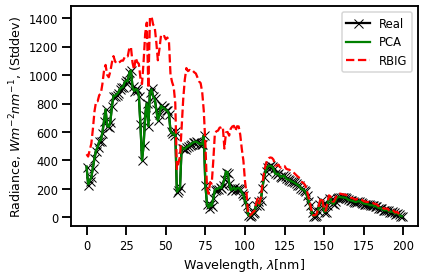

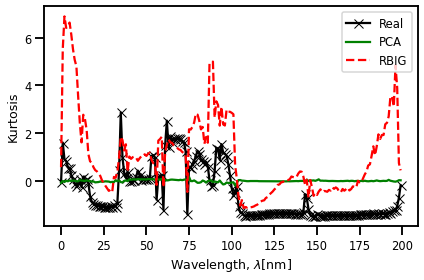

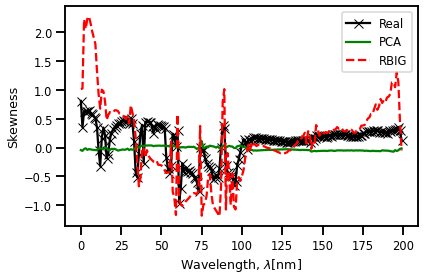

In [79]:

# ========================
# MEAN
# ========================
fig, ax = plt.subplots(figsize=(6, 4))

X_mean = x_transformer.inverse_transform(X_vec_s).mean(axis=0)
X_samples_pca_mean = x_transformer.inverse_transform(X_samples_pca).mean(axis=0)
X_samples_lopt_mean = x_transformer.inverse_transform(X_samples_lopt).mean(axis=0)
ax.plot(
    X_mean,
    label="Real", marker='x', color='black')
ax.plot(
    X_samples_pca_mean,
    label="PCA", color='green')
ax.plot(
    X_samples_lopt_mean,
    label=f"RBIG", linestyle='--', color='red')

ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
ax.set_ylabel(r"Radiance, $Wm^{-2}nm^{-1}$ (Mean)")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_mean": plt})
else:
    plt.savefig("./figures/gen_data_mean.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ========================
# STANDARD DEVIATION
# ========================

fig, ax = plt.subplots(figsize=(6, 4))

X_std = x_transformer.inverse_transform(X_vec_s).std(axis=0)
X_samples_pca_std = x_transformer.inverse_transform(X_samples_pca).std(axis=0)
X_samples_lopt_std = x_transformer.inverse_transform(X_samples_lopt).std(axis=0)


ax.plot(
    X_std,
    label="Real", marker='x', color='black')
ax.plot(
    X_samples_pca_std,
    label="PCA", color='green')
ax.plot(
    X_samples_lopt_std,
    label=f"RBIG", linestyle='--', color='red')

ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
ax.set_ylabel(r"Radiance, $Wm^{-2}nm^{-1}$, (Stddev)")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_std": plt})
else:
    plt.savefig("./figures/gen_data_std.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ========================
# KURTOSIS
# ========================

fig, ax = plt.subplots(figsize=(6, 4))

X_kurt = stats.kurtosis(x_transformer.inverse_transform(X_vec_s), axis=0)

ax.plot(
    X_kurt,
    label="Real", marker='x', color='black')
ax.plot(
    stats.kurtosis(x_transformer.inverse_transform(X_samples_pca), axis=0),
    label="PCA", color='green')
ax.plot(
    stats.kurtosis(x_transformer.inverse_transform(X_samples_lopt)),
    label=f"RBIG", linestyle='--', color='red')

ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
ax.set_ylabel(r"Kurtosis")
plt.legend()
plt.tight_layout()
if wandb.config.log:
    wandb.log({"gen_data_kurtosis": plt})
else:
    plt.savefig("./figures/gen_data_kurtosis.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

# ==========
# SKEWNESS
# ==========
fig, ax = plt.subplots(figsize=(6, 4))


X_skew = stats.skew(x_transformer.inverse_transform(X_vec_s), axis=0)

ax.plot(
    X_skew,
    label="Real", marker='x', color='black')
ax.plot(
    stats.skew(x_transformer.inverse_transform(X_samples_pca), axis=0),
    label="PCA", color='green')
ax.plot(
    stats.skew(x_transformer.inverse_transform(X_samples_lopt)),
    label=f"RBIG", linestyle='--', color='red')

ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
ax.set_ylabel(r"Skewness")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_skew": plt})
else:
    plt.savefig("./figures/gen_data_skew.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

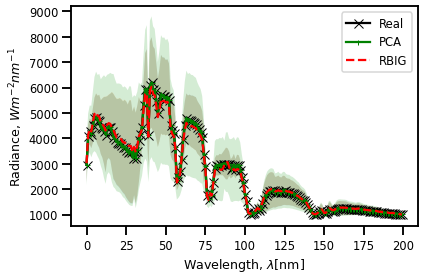

In [77]:
# ========================
# Genderated
# ========================

fig, ax = plt.subplots(figsize=(6, 4))



ax.plot(
    X_mean,
    label="Real", marker='x', color='black')
plt.fill_between(
    np.arange(0, X_mean.shape[0]),
    X_mean + 1.96 * X_std,
    X_mean - 1.96 * X_std,
    alpha=0.2
)

# PCA
ax.plot(
    X_samples_pca_mean,
    label="PCA", marker='+', markersize=5, color='green')
plt.fill_between(
    np.arange(0, X_samples_pca_mean.shape[0]),
    X_samples_pca_mean + 1.96 * X_std,
    X_samples_pca_mean - 1.96 * X_std,
    alpha=0.2
)
# PCA
ax.plot(
    X_samples_lopt_mean,
    label=f"RBIG", linestyle='--', color='red')
plt.fill_between(
    np.arange(0, X_samples_lopt_mean.shape[0]),
    X_samples_lopt_mean + 1.96 * X_samples_lopt_std,
    X_samples_lopt_mean - 1.96 * X_samples_lopt_std,
    alpha=0.2
)

ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
ax.set_ylabel(r"Radiance, $Wm^{-2}nm^{-1}$")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_std": plt})
else:
    plt.savefig("./figures/gen_data.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()


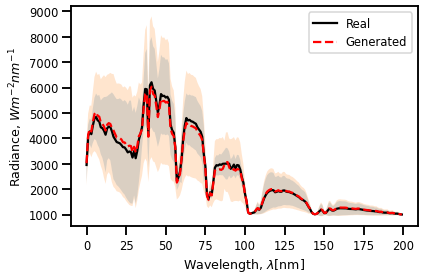

In [74]:
# ========================
# Genderated
# ========================

fig, ax = plt.subplots(figsize=(6, 4))



ax.plot(
    X_mean,
    label="Real", color='black')
plt.fill_between(
    np.arange(0, X_mean.shape[0]),
    X_mean + 1.96 * X_std,
    X_mean - 1.96 * X_std,
    alpha=0.2
)

# PCA
ax.plot(
    X_samples_lopt_mean,
    label=f"Generated", linestyle='--', color='red')
plt.fill_between(
    np.arange(0, X_samples_lopt_mean.shape[0]),
    X_samples_lopt_mean + 1.96 * X_samples_lopt_std,
    X_samples_lopt_mean - 1.96 * X_samples_lopt_std,
    alpha=0.2
)

ax.set_xlabel(r"Wavelength, $\lambda$[nm]")
ax.set_ylabel(r"Radiance, $Wm^{-2}nm^{-1}$")
plt.legend()
plt.tight_layout()

if wandb.config.log:
    wandb.log({"gen_data_original": plt})
else:
    plt.savefig("./figures/gen_data_original.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

## Representative Areas

For this demo, we're going to take a few key bands which seem to be causing problems.

In [75]:
bands = [10, 20, 50, 100, 150]

corner_data = {
    "real": X_vec_s[:, bands],
    "pca": X_samples_pca[:, bands],
    "rbig": X_samples_lopt[:, bands],
    
} 


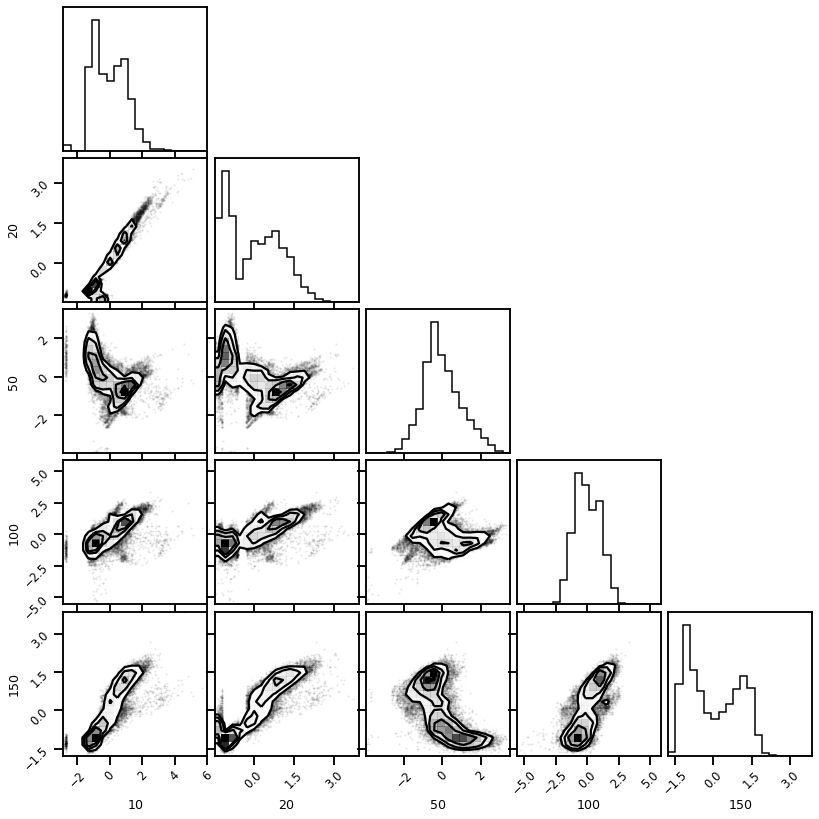

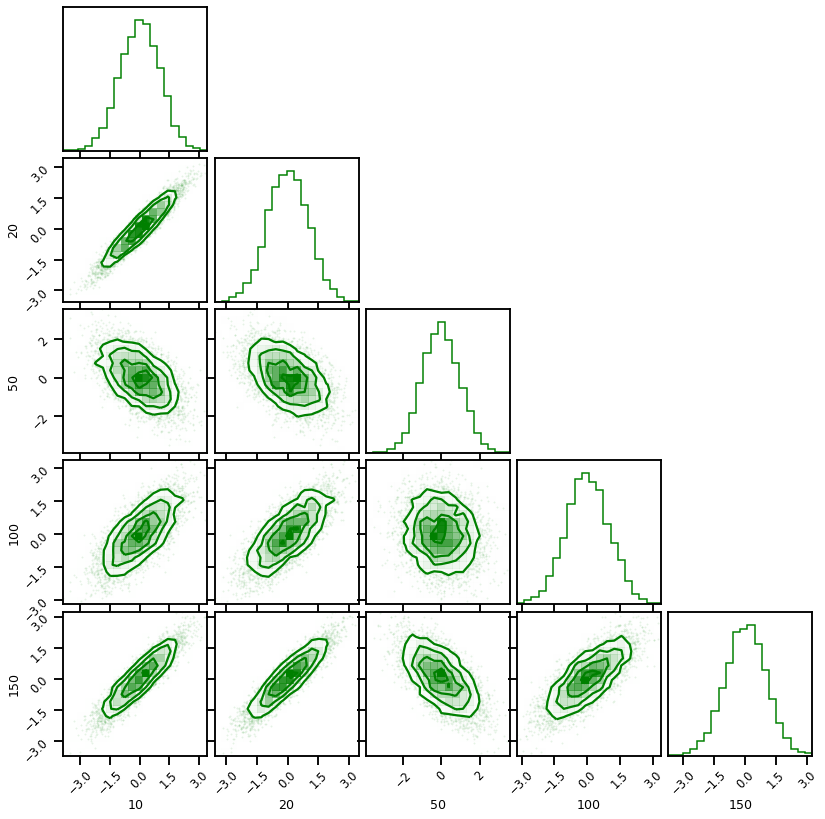

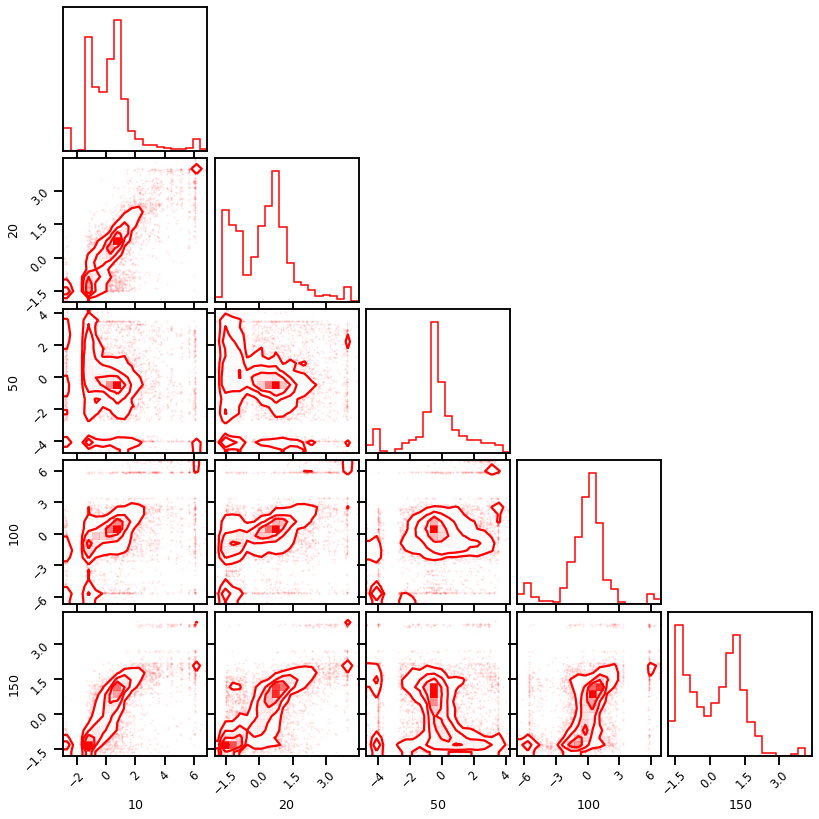

In [76]:
import corner


figure = corner.corner(
    xs=corner_data['real'],
    labels=bands,
    color="black"
)
if wandb.config.log:
    wandb.log({"corner_gen_real": plt.gcf()})
else:
    figure.savefig("./figures/corner_gen_real.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)

figure = corner.corner(
    xs=corner_data['pca'],
    labels=bands,
    color="green"
)
if wandb.config.log:
    wandb.log({"corner_gen_pca": plt.gcf()})
else:
    figure.savefig("./figures/corner_gen_pca.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)


figure = corner.corner(
    xs=corner_data['rbig'],
    labels=bands,
    color="red"
)
if wandb.config.log:
    wandb.log({"corner_gen_rbig": plt.gcf()})
else:
    figure.savefig("./figures/corner_gen_rbig.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
